In [1]:
import lib_ar as ar
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#Q1 
"""
def power_method(A, num_simulations: int):
	n = A.shape[0]
	
	# Step 1: Initialize a random vector
	v = np.random.rand(n)
	
	# Step 2: Power method iterations
	for _ in range(num_simulations):
		# Multiply v by the matrix
		Av = np.dot(A, v)
		
		# Normalize Av
		v = Av / np.linalg.norm(Av)
		
	# Step 3: Calculate the eigenvalue
	eigenvalue = np.dot(v, np.dot(A, v)) / np.dot(v, v)
	
	return eigenvalue


def gram_schmidt(A):
	Q = np.zeros_like(A)
	R = np.zeros((A.shape[1], A.shape[1]))

	for k in range(A.shape[1]):
		R[k, k] = np.linalg.norm(A[:, k])
		Q[:, k] = A[:, k] / R[k, k]
		for j in range(k + 1, A.shape[1]):
			R[k, j] = np.dot(Q[:, k], A[:, j])
			A[:, j] = A[:, j] - R[k, j] * Q[:, k]
	return Q, R

def qr_factorization(A, num_simulations: int):
	for _ in range(num_simulations):
		Q, R = gram_schmidt(A)
		A = R @ Q
	return np.diag(A)
#"""

A = np.array([[4,2/3,-4/3,4/3],[2/3,4,0,0],[-4/3,0,6,2],[4/3,0,2,6]])

eigenvalue = ar.power_method(A, 1000)
print('Largest eigenvalue using Power method:')
print(eigenvalue)

eigenvalues = ar.qr_factorization(A, 1000)
print('Eigenvalues using QR factorization:')
print(eigenvalues)


Largest eigenvalue using Power method:
8.0
Eigenvalues using QR factorization:
[8. 6. 4. 2.]


/tmp/ipykernel_18997/773412646.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



 Fitting polynomial of degree 3 

coefficients: 
 a3: 7.668677622911056
 a2: -11.128217777645723
 a1: 4.725861442142919
 a0: 0.5746586674195354

 y = 7.668677622911056x^3 + -11.128217777645723x^2 + 4.725861442142919x + 0.5746586674195354


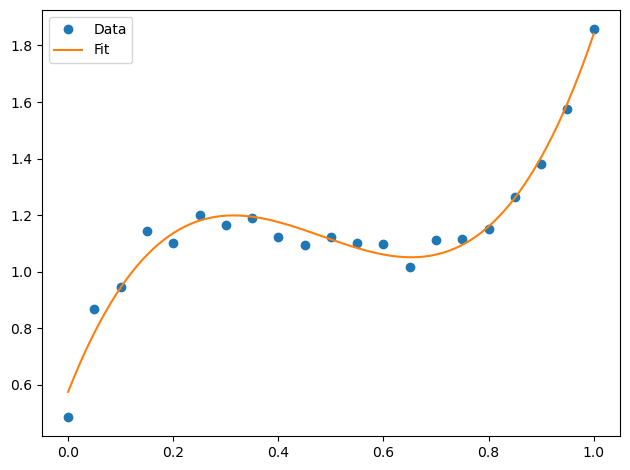


 Fitting with a modified basis 

coefficients: 
 a3: 0.23964617571597022
 a2: 0.04684983209010629
 a1: 0.3935144679881527
 a0: 1.160969479033552

 y = 1.160969479033552 + 0.3935144679881527*(2*x - 1) + 0.04684983209010629*(8*x**2 - 8*x + 1) + 0.23964617571597022*(32*x**3 - 48*x**2 + 18*x - 1)


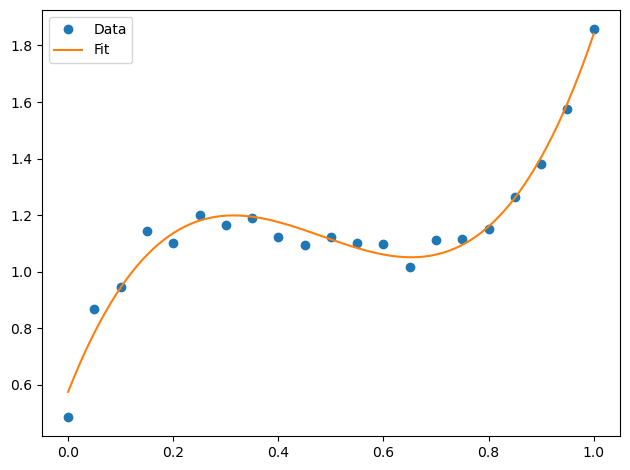


 Comparing the fits 



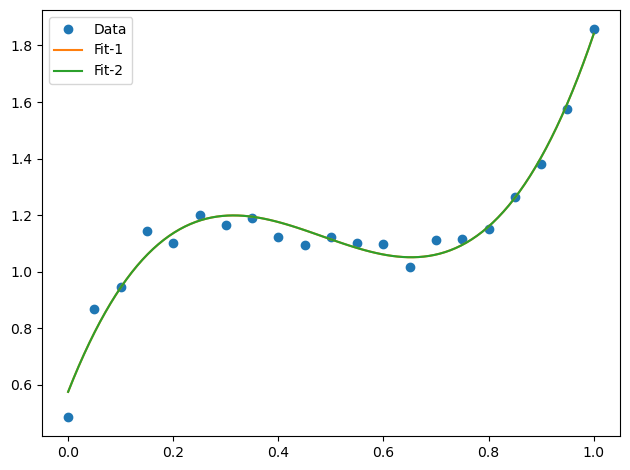

In [3]:
import pandas as pd

# Read the file
data = pd.read_csv('assign3fit.txt', sep='\t', comment='#', header=None)

x  = data[0].values
y  = data[1].values

print('\n Fitting polynomial of degree 3 \n')
# Create the Vandermonde matrix
V = np.column_stack([x**(3-i) for i in range(4)])

# Solve for c
coefficients = np.linalg.lstsq(V, y, rcond=None)[0]
a3, a2, a1, a0 = coefficients

# Print the coefficients
print(f"coefficients: \n a3: {a3}\n a2: {a2}\n a1: {a1}\n a0: {a0}")

#print final equation
print(f"\n y = {a3}x^3 + {a2}x^2 + {a1}x + {a0}")

# Plot the data
plt.plot(x, y, 'o', label='Data')
#Plot the fitted polynomial
x_fit = np.linspace(0, 1, 100)
y_fit1 = a3*x_fit**3 + a2*x_fit**2 + a1*x_fit + a0
plt.plot(x_fit, y_fit1, label='Fit')
plt.legend()
plt.tight_layout()
plt.show()

print('\n Fitting with a modified basis \n')
# Define the basis functions
phi_0 = np.ones_like(x)
phi_1 = 2*x - 1
phi_2 = 8*x**2 - 8*x + 1
phi_3 = 32*x**3 - 48*x**2 + 18*x - 1

# Create the matrix for the basis functions
V = np.column_stack([phi_0, phi_1, phi_2, phi_3])

# Solve for coefficients
coefficients = np.linalg.lstsq(V, y, rcond=None)[0]

a0, a1, a2, a3 = coefficients

# Print the coefficients
print(f"coefficients: \n a3: {a3}\n a2: {a2}\n a1: {a1}\n a0: {a0}")

#print final equation
print(f"\n y = {a0} + {a1}*(2*x - 1) + {a2}*(8*x**2 - 8*x + 1) + {a3}*(32*x**3 - 48*x**2 + 18*x - 1)")

# Plot the data
plt.plot(x, y, 'o', label='Data')

# Plot the fitted polynomial
x_fit = np.linspace(0, 1, 100)
y_fit2 = a0*1 + a1*(2*x_fit - 1) + a2*(8*x_fit**2 - 8*x_fit + 1) + a3*(32*x_fit**3 - 48*x_fit**2 + 18*x_fit - 1)

plt.plot(x_fit, y_fit2, label='Fit')
plt.legend()
plt.tight_layout()
plt.show()

#comparing fits
print('\n Comparing the fits \n')
# Plot the data
plt.plot(x, y, 'o', label='Data')
plt.plot(x_fit, y_fit1, label='Fit-1')
plt.plot(x_fit, y_fit2, label='Fit-2')
plt.legend()
plt.tight_layout()
plt.show()


**Understanding Matrix Condition Number: A Guide to Numerical Stability**

In numerical analysis, the condition number of a matrix quantifies its sensitivity to errors during computations. It essentially predicts how much the solution (output) might change due to small variations in the input data (matrix elements). A low condition number indicates a well-conditioned matrix, meaning small input errors lead to minimal output discrepancies. Conversely, a high condition number signifies an ill-conditioned matrix, where slight input errors can be amplified into significant output errors.

**Calculating Condition Number in Python**

Python's `numpy.linalg` module offers two primary functions for computing the condition number:

1. **`numpy.linalg.cond(x, p=None)`:** This function calculates the condition number using various norms. The `p` parameter specifies the norm type (refer to `numpy.linalg.norm` for details). If `p` is `None`, the default 2-norm (largest singular value) is used. The condition number itself is the ratio of the largest singular value to the smallest.

2. **`numpy.linalg.norm(x, ord=None)`:** This more versatile function computes different matrix norms, including the Frobenius norm and the condition number. The `ord` parameter dictates the norm type; if `ord` is `None`, the Frobenius norm is applied. Similar to `cond`, the condition number is obtained by dividing the largest singular value by the smallest.

**Choosing the Optimal Approach**

The appropriate function and norm selection for calculating the condition number depend on the specific problem and the matrix's characteristics. Here's a breakdown of some considerations:

* **Computational Cost:** The 2-norm offers the most accurate condition number estimate but is computationally expensive. The 1-norm and infinity norm are faster but less precise.
* **Matrix Shape:** The Frobenius norm is often preferred for non-square matrices.

By understanding the condition number and selecting the suitable tool in `numpy.linalg`, you can assess the stability of your numerical computations and ensure reliable results. 

In [4]:
#Q3

# Observed frequencies
observed = np.array([77, 150, 210, 125, 38])

# Total number of students
total_students = observed.sum()

# Z-scores for the grades
z_scores = np.array([2, 1, 0, -1, -2])

# Calculate the expected frequencies for each grade based on the standard normal distribution
expected = total_students * (stats.norm.cdf(z_scores[:-1]) - stats.norm.cdf(z_scores[1:]))

# Add the expected frequency for the last grade (F)
expected = np.append(expected, total_students - expected.sum())

# Perform chi-square test
chi2, p = stats.chisquare(observed, expected)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Check if the p-value is less than the significance level
for alpha in [0.05, 0.10]:
    if p < alpha:
        print(f"At the {alpha*100}% level of significance, we reject the null hypothesis.")
    else:
        print(f"At the {alpha*100}% level of significance, we do not reject the null hypothesis.")

Chi-square statistic: 42.40446548602843
P-value: 1.375257324594647e-08
At the 5.0% level of significance, we reject the null hypothesis.
At the 10.0% level of significance, we reject the null hypothesis.


In [5]:
#Q4

# Focal lengths for shipment A and B
shipment_A = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65, 4.80])
shipment_B = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# Calculate sample variances
var_A = shipment_A.var(ddof=1)
var_B = shipment_B.var(ddof=1)

"""
# Perform F-test
def F_test(A, B, var_A, var_B):
	F = var_A / var_B
	df1 = len(A) - 1
	df2 = len(B) - 1
	p_value_F = 1 - stats.f.cdf(F, df1, df2)
	return F, p_value_F
    
"""

F, p_value_F = ar.F_test(shipment_A, shipment_B, var_A, var_B)

print(f"F-test statistic: {F}")
print(f"P-value: {p_value_F}")

mean_A = shipment_A.mean()
mean_B = shipment_B.mean()

std_A = shipment_A.std(ddof=1)
std_B = shipment_B.std(ddof=1)
"""
# Perform t-test
def t_test(mean_A, mean_B, std_A, std_B, A, B):
	t = (mean_A - mean_B) / np.sqrt(std_A**2/len(A) + std_B**2/len(B))
	p_value_t = 2 * (1 - stats.t.cdf(np.abs(t), len(A) + len(B) - 2))
	return t, p_value_t
"""
t, p_value_t = ar.t_test(mean_A, mean_B, std_A, std_B, shipment_A, shipment_B)

print(f"\nt-test statistic: {t}")
print(f"P-value: {p_value_t}")

F-test statistic: 1.8106334841629022
P-value: 0.24021296477952714

t-test statistic: -0.6348586013678076
P-value: 0.5335080149790419
